+++++[link text](https:// [link text](https://))### 1. Read environment

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 32 # minibatch size
# GAMMA = 0.9  # discount factor
TAU = 1e-3  # for soft update of target parameters
LR = 1e-4  # learning rate
UPDATE_EVERY = 4  # how often to update the network
def dqn(n_episodes=epoch_no, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.993,bench_score=1500000):
weight_decay=0.999


### 4. Plotting and Data Record

In [1]:
import pandas as pd
df_dqnp = pd.read_csv('data_dqnp.csv', skiprows=1, names=['dqnp_epi_scores','dqnp_epi_task','dqnp_epi_energy','dqnp_epi_latency','dqnp_epi_num_task','dqnp_epi_task_P1','dqnp_epi_task_P2','dqnp_epi_task_P3',
                     'dqnp_epi_latency_P1','dqnp_epi_latency_P2','dqnp_epi_latency_P3','dqnp_epi_energy_P1','dqnp_epi_energy_P2','dqnp_epi_energy_P3','dqnp_epi_num_task_P1',
                     'dqnp_epi_num_task_P2','dqnp_epi_num_task_P3','dqnp_epi_datasize','dqnp_epi_datasize_P1','dqnp_epi_datasize_P2'
                     'dqnp_epi_datasize_P3','dqnp_epi_task_select_P1','dqnp_epi_task_select_P2','dqnp_epi_task_select_P3',\
                    'dqnp_epi_tran_latency_P1','dqnp_epi_tran_latency_P2','dqnp_epi_tran_latency_P3',\
                    'dqnp_epi_comp_latency_P1','dqnp_epi_comp_latency_P2','dqnp_epi_comp_latency_P3'])

df_dqnb = pd.read_csv('data_dqnb.csv', skiprows=1, names=['dqnb_epi_scores','dqnb_epi_task','dqnb_epi_energy','dqnb_epi_latency','dqnb_epi_num_task','dqnb_epi_task_P1','dqnb_epi_task_P2','dqnb_epi_task_P3',
                     'dqnb_epi_latency_P1','dqnb_epi_latency_P2','dqnb_epi_latency_P3','dqnb_epi_energy_P1','dqnb_epi_energy_P2','dqnb_epi_energy_P3','dqnb_epi_num_task_P1',
                     'dqnb_epi_num_task_P2','dqnb_epi_num_task_P3','dqnb_epi_datasize','dqnb_epi_datasize_P1','dqnb_epi_datasize_P2'
                     'dqnb_epi_datasize_P3','dqnb_epi_task_select_P1','dqnb_epi_task_select_P2','dqnb_epi_task_select_P3',\
                    'dqnb_epi_tran_latency_P1','dqnb_epi_tran_latency_P2','dqnb_epi_tran_latency_P3',\
                    'dqnb_epi_comp_latency_P1','dqnb_epi_comp_latency_P2','dqnb_epi_comp_latency_P3'])




In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Extract the specified column as a list
dqnp_epi_scores = df_dqnp['dqnp_epi_energy'].tolist()
dqnb_epi_scores = df_dqnb['dqnb_epi_energy'].tolist()
print(np.mean(dqnp_epi_scores[250:]))
print(np.mean(dqnb_epi_scores[250:]))

0.019317664760811915
0.022450574857962306


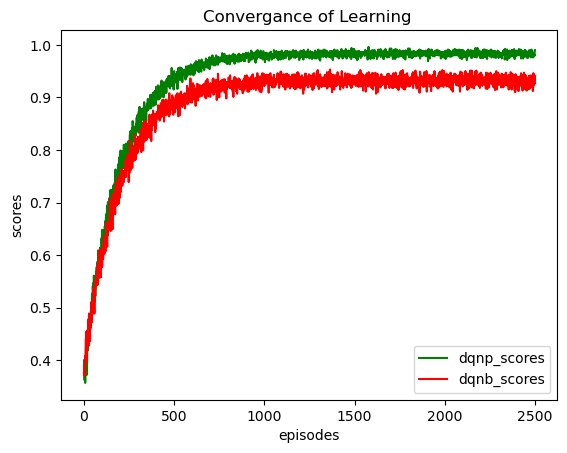

NameError: name 'greedy_epi_scores' is not defined

In [4]:
import os
import matplotlib.pyplot as plt

# Extract the specified column as a list
dqnp_epi_scores = df_dqnp['dqnp_epi_scores'].tolist()
dqnb_epi_scores = df_dqnb['dqnb_epi_scores'].tolist()
#greedy_epi_scores = df_greedy['greedy_epi_scores'].tolist()



plt.plot(dqnp_epi_scores, label='dqnp_scores',color='green')
plt.plot(dqnb_epi_scores, label='dqnb_scores',color='red')
#plt.plot(greedy_epi_scores, label='greedy_scores',color='blue')


# Set the labels and title
plt.xlabel('episodes')
plt.ylabel('scores')
plt.title('Convergance of Learning ')
plt.legend()

# Show the plot
plt.show()

print(dqnp_epi_scores[-1],dqnb_epi_scores[-1],greedy_epi_scores[-1])


In [ ]:
print(dqnb_epi_scores[-1])
window_size=100

In [ ]:


# Extract the specified column as a list
dqnp_epi_latency = df_dqnp['dqnp_epi_latency'].tolist()
dqnb_epi_latency = df_dqnb['dqnb_epi_latency'].tolist()
#greedy_epi_latency = df_greedy['greedy_epi_latency'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb']
data=[np.mean(dqnp_epi_latency[-window_size:]), np.mean(dqnb_epi_latency[-window_size:])]
print(data)
colors=['green','red']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Latency')
ax.set_title('Latency vs Algorithm')

plt.show()




In [ ]:


# Extract the specified column as a list
dqnp_epi_energy = df_dqnp['dqnp_epi_energy'].tolist()
dqnb_epi_energy = df_dqnb['dqnb_epi_energy'].tolist()
greedy_epi_energy = df_greedy['greedy_epi_energy'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_energy[-window_size:])/window_size,sum(dqnb_epi_energy[-window_size:])/window_size,sum(greedy_epi_energy[-window_size:])/window_size]
print(data)
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('energy')
ax.set_title('energy vs Algorithm')

plt.show()



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_task_select_P1=df_dqnp['dqnp_epi_task_select_P1']
dqnp_epi_task_select_P2=df_dqnp['dqnp_epi_task_select_P2']
dqnp_epi_task_select_P3=df_dqnp['dqnp_epi_task_select_P3']

dqnb_epi_task_select_P1=df_dqnb['dqnb_epi_task_select_P1']
dqnb_epi_task_select_P2=df_dqnb['dqnb_epi_task_select_P2']
dqnb_epi_task_select_P3=df_dqnb['dqnb_epi_task_select_P3']

greedy_epi_task_select_P1=df_greedy['greedy_epi_task_select_P1']
greedy_epi_task_select_P2=df_greedy['greedy_epi_task_select_P2']
greedy_epi_task_select_P3=df_greedy['greedy_epi_task_select_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_task_select_P1[-window_size:])/window_size,sum(dqnp_epi_task_select_P2[-window_size:])/window_size,sum(dqnp_epi_task_select_P3[-window_size:])/window_size],[sum(dqnb_epi_task_select_P1[-window_size:])/window_size,
    sum(dqnb_epi_task_select_P2[-window_size:])/window_size,sum(dqnb_epi_task_select_P3[-window_size:])/window_size],[sum(greedy_epi_task_select_P1[-window_size:])/window_size,
    sum(greedy_epi_task_select_P2[-window_size:])/window_size,sum(greedy_epi_task_select_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Num_Task_Selection')
ax.set_title('Num_Task_Selection vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1000)
print(data)


In [ ]:


# Extract the specified column as a list
dqnp_epi_datasize = df_dqnp['dqnp_epi_datasize'].tolist()
dqnb_epi_datasize = df_dqnb['dqnb_epi_datasize'].tolist()
greedy_epi_datasize = df_greedy['greedy_epi_datasize'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_datasize[-window_size:])/window_size,sum(dqnb_epi_datasize[-window_size:])/window_size,sum(greedy_epi_datasize[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Mean_Datasize')
ax.set_title('Mean_Datasize vs Algorithm')
plt.show()
print(data)



In [ ]:


# Extract the specified column as a list
dqnp_epi_task = df_dqnp['dqnp_epi_task'].tolist()
dqnb_epi_task = df_dqnb['dqnb_epi_task'].tolist()
greedy_epi_task = df_greedy['greedy_epi_task'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_task[-window_size:])/window_size,sum(dqnb_epi_task[-window_size:])/window_size,sum(greedy_epi_task[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Task_Completion_Ratio')
ax.set_title('Task_Completion_Ratio vs Algorithm')
plt.show()
print(data)



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_num_task_P1=df_dqnp['dqnp_epi_num_task_P1']
dqnp_epi_num_task_P2=df_dqnp['dqnp_epi_num_task_P2']
dqnp_epi_num_task_P3=df_dqnp['dqnp_epi_num_task_P3']

dqnb_epi_num_task_P1=df_dqnb['dqnb_epi_num_task_P1']
dqnb_epi_num_task_P2=df_dqnb['dqnb_epi_num_task_P2']
dqnb_epi_num_task_P3=df_dqnb['dqnb_epi_num_task_P3']

greedy_epi_num_task_P1=df_greedy['greedy_epi_num_task_P1']
greedy_epi_num_task_P2=df_greedy['greedy_epi_num_task_P2']
greedy_epi_num_task_P3=df_greedy['greedy_epi_num_task_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_num_task_P1[-window_size:])/window_size,sum(dqnp_epi_num_task_P2[-window_size:])/window_size,sum(dqnp_epi_num_task_P3[-window_size:])/window_size],[sum(dqnb_epi_num_task_P1[-window_size:])/window_size,
    sum(dqnb_epi_num_task_P2[-window_size:])/window_size,sum(dqnb_epi_num_task_P3[-window_size:])/window_size],[sum(greedy_epi_num_task_P1[-window_size:])/window_size,
    sum(greedy_epi_num_task_P2[-window_size:])/window_size,sum(greedy_epi_num_task_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Num_Task_completion')
ax.set_title('Num_Task_Completion vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1000)
print(data)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_latency_P1=df_dqnp['dqnp_epi_latency_P1']
dqnp_epi_latency_P2=df_dqnp['dqnp_epi_latency_P2']
dqnp_epi_latency_P3=df_dqnp['dqnp_epi_latency_P3']

dqnb_epi_latency_P1=df_dqnb['dqnb_epi_latency_P1']
dqnb_epi_latency_P2=df_dqnb['dqnb_epi_latency_P2']
dqnb_epi_latency_P3=df_dqnb['dqnb_epi_latency_P3']

greedy_epi_latency_P1=df_greedy['greedy_epi_latency_P1']
greedy_epi_latency_P2=df_greedy['greedy_epi_latency_P2']
greedy_epi_latency_P3=df_greedy['greedy_epi_latency_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_latency_P1[-window_size:])/window_size,sum(dqnp_epi_latency_P2[-window_size:])/window_size,sum(dqnp_epi_latency_P3[-window_size:])/window_size],[sum(dqnb_epi_latency_P1[-window_size:])/window_size,
    sum(dqnb_epi_latency_P2[-window_size:])/window_size,sum(dqnb_epi_latency_P3[-window_size:])/window_size],[sum(greedy_epi_latency_P1[-window_size:])/window_size,
    sum(greedy_epi_latency_P2[-window_size:])/window_size,sum(greedy_epi_latency_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Latency')
ax.set_title('Latency vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0,0.1)
print(data)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_energy_P1=df_dqnp['dqnp_epi_energy_P1']
dqnp_epi_energy_P2=df_dqnp['dqnp_epi_energy_P2']
dqnp_epi_energy_P3=df_dqnp['dqnp_epi_energy_P3']

dqnb_epi_energy_P1=df_dqnb['dqnb_epi_energy_P1']
dqnb_epi_energy_P2=df_dqnb['dqnb_epi_energy_P2']
dqnb_epi_energy_P3=df_dqnb['dqnb_epi_energy_P3']

greedy_epi_energy_P1=df_greedy['greedy_epi_energy_P1']
greedy_epi_energy_P2=df_greedy['greedy_epi_energy_P2']
greedy_epi_energy_P3=df_greedy['greedy_epi_energy_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_energy_P1[-window_size:])/window_size,sum(dqnp_epi_energy_P2[-window_size:])/window_size,sum(dqnp_epi_energy_P3[-window_size:])/window_size],[sum(dqnb_epi_energy_P1[-window_size:])/window_size,
    sum(dqnb_epi_energy_P2[-window_size:])/window_size,sum(dqnb_epi_energy_P3[-window_size:])/window_size],[sum(greedy_epi_energy_P1[-window_size:])/window_size,
    sum(greedy_epi_energy_P2[-window_size:])/window_size,sum(greedy_epi_energy_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Energy_Consumption')
ax.set_title('Energy_Consumption vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 0.050)
print(data)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_task_P1=df_dqnp['dqnp_epi_task_P1']
dqnp_epi_task_P2=df_dqnp['dqnp_epi_task_P2']
dqnp_epi_task_P3=df_dqnp['dqnp_epi_task_P3']

dqnb_epi_task_P1=df_dqnb['dqnb_epi_task_P1']
dqnb_epi_task_P2=df_dqnb['dqnb_epi_task_P2']
dqnb_epi_task_P3=df_dqnb['dqnb_epi_task_P3']

greedy_epi_task_P1=df_greedy['greedy_epi_task_P1']
greedy_epi_task_P2=df_greedy['greedy_epi_task_P2']
greedy_epi_task_P3=df_greedy['greedy_epi_task_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_task_P1[-window_size:])/window_size,sum(dqnp_epi_task_P2[-window_size:])/window_size,sum(dqnp_epi_task_P3[-window_size:])/window_size],[sum(dqnb_epi_task_P1[-window_size:])/window_size,
    sum(dqnb_epi_task_P2[-window_size:])/window_size,sum(dqnb_epi_task_P3[-window_size:])/window_size],[sum(greedy_epi_task_P1[-window_size:])/window_size,
    sum(greedy_epi_task_P2[-window_size:])/window_size,sum(greedy_epi_task_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Task_Completion_Ratio')
ax.set_title('Task_Completion_Ratio vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1.2)
print(data)


In [ ]:
import numpy as np

# Sample class labels (replace this with your actual labels)
y_train = np.array([0, 1, 1, 2, 2, 2, 3, 3])

# Get unique classes and their counts
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Print the results
print("Unique Classes:", unique_classes)
print("Class Counts:", class_counts)


In [ ]:
dqnp_epi_tran_latency_P1 = df_dqnp['dqnp_epi_tran_latency_P1'].tolist()
dqnp_epi_tran_latency_P2 = df_dqnp['dqnp_epi_tran_latency_P2'].tolist()
dqnp_epi_tran_latency_P3 = df_dqnp['dqnp_epi_tran_latency_P3'].tolist()

dqnp_epi_comp_latency_P1 = df_dqnp['dqnp_epi_comp_latency_P1'].tolist()
dqnp_epi_comp_latency_P2 = df_dqnp['dqnp_epi_comp_latency_P2'].tolist()
dqnp_epi_comp_latency_P3 = df_dqnp['dqnp_epi_comp_latency_P3'].tolist()


dqnp_epi_task_P1 = df_dqnp['dqnp_epi_task_P1'].tolist()
dqnp_epi_task_P2 = df_dqnp['dqnp_epi_task_P2'].tolist()
dqnp_epi_task_P3 = df_dqnp['dqnp_epi_task_P3'].tolist()


dqnp_epi_datasize_P1 = df_dqnp['dqnp_epi_datasize_P1'].tolist()
dqnp_epi_datasize_P2 = df_dqnp['dqnp_epi_datasize_P2'].tolist()
dqnp_epi_datasize_P3 = df_dqnp['dqnp_epi_datasize_P3'].tolist()

dqnp_epi_energy_P1=df_dqnp['dqnp_epi_energy_P1'].tolist()
dqnp_epi_energy_P2=df_dqnp['dqnp_epi_energy_P2'].tolist()
dqnp_epi_energy_P3=df_dqnp['dqnp_epi_energy_P3'].tolist()


In [ ]:
task_select=[ np.mean(dqnp_epi_task_select_P1[-window_size:]),  np.mean(dqnp_epi_task_select_P2[-window_size:]), np.mean(dqnp_epi_task_select_P3[-window_size:])]
task_done=[ np.mean(dqnp_epi_task_P1[-window_size:]),  np.mean(dqnp_epi_task_P2[-window_size:]), np.mean(dqnp_epi_task_P3[-window_size:])]
tran_time=[ np.mean(dqnp_epi_tran_latency_P1[-window_size:]),  np.mean(dqnp_epi_tran_latency_P2[-window_size:]), np.mean(dqnp_epi_tran_latency_P3[-window_size:])]
comp_time=[ np.mean(dqnp_epi_comp_latency_P1[-window_size:]),  np.mean(dqnp_epi_comp_latency_P2[-window_size:]), np.mean(dqnp_epi_comp_latency_P3[-window_size:])]
tran_energy=[0.15*tran_time[0], 0.15*tran_time[1],0.15*tran_time[2]]

comp_energy=[np.mean(dqnp_epi_energy_P1[-window_size:])-tran_energy[0], np.mean(dqnp_epi_energy_P2[-window_size:])-tran_energy[1],\
            np.mean(dqnp_epi_energy_P3[-window_size:])-tran_energy[2]]

datasize= [np.mean(dqnp_epi_datasize_P1[-window_size:]), np.mean(dqnp_epi_datasize_P2[-window_size:]),\
            np.mean(dqnp_epi_datasize_P3[-window_size:])]
overall_energy=np.mean(dqnp_epi_energy[-window_size:])
overall_latency=np.mean(dqnp_epi_latency[-window_size:])
epi_energy=[ np.mean(dqnp_epi_energy_P1[-window_size:]),  np.mean(dqnp_epi_energy_P2[-window_size:]), np.mean(dqnp_epi_energy_P3[-window_size:])]

In [ ]:
print('task_select',task_select)
print('task_done',task_done)
print('comp_time',comp_time)
print('tran_time',tran_time)
print('tran_energy',tran_energy)
print('comp_energy',comp_energy)
print('data',datasize)
print('energy',overall_energy)
print('latency',overall_latency)
print('epi_energy',epi_energy)


In [ ]:
epi__energy=[ np.mean(dqnp_epi_energy_P1[-window_size:]),  np.mean(dqnp_epi_energy_P2[-window_size:]), np.mean(dqnp_epi_energy_P3[-window_size:])]
